# Udacity project: computing statistics of card draws

______

This note book will illustrate a python implementation of the random card draw from the Udacity module on Descriptive Statistics.

First, import the required packages and set appropriate parameters:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

## Step 1: create the required functions

The **`create_deck`** function returns a list representing a standard deck of 52 cards.

In [2]:
def create_deck():
    ranks = [str(x) for x in range(2, 11)] + list('JQKA')
    suits = list('sdch')
    
    return [rank+suit for suit in suits for rank in ranks]

The **`choose_three`** function will return a list of three cards chosen at random, *without replacement*, from a deck.  Documentation on the np.random.choice is [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.choice.html).

In [3]:
def choose_three(deck):
    return list(np.random.choice(deck, 3, replace=False))

The function **`sample_the_deck`** pull three card samples a specified number of times (**`num_trials`**).

In [4]:
def sample_the_deck(num_trials, deck):
    return [choose_three(deck) for i in range(num_trials)]

The **`card_value`** function returns a value (int) for any card value created in the **`create_deck`** methodology.

In [5]:
def card_value(card):
    value = card[:-1]
    if value == "A":
        return 1
    elif value in "JQK":
        return 10
    else:
        return int(value)

## Step 2: calculate statistics for drawing a single card from the deck

Now, create a deck of cards, and display a few first/last elements to make sure everything is working correctly...

In [6]:
deck = create_deck()
print(deck[:3], '...', deck[-3:])

['2s', '3s', '4s'] ... ['Qh', 'Kh', 'Ah']


Create a new list with the card values corresponding to each card, then display a histogram of the frequencies of card values from a single draw.

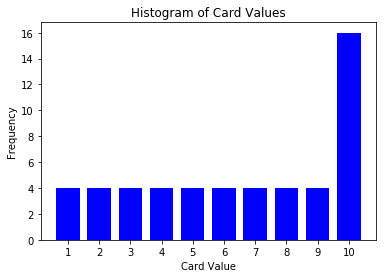

In [7]:
deck_values = [card_value(card) for card in deck]

plt.hist(deck_values, bins=[0.5+x for x in range(11)], facecolor='blue', rwidth=.75)
plt.xticks(range(1,11))
plt.title('Histogram of Card Values')
plt.xlabel('Card Value')
plt.ylabel('Frequency')
plt.show()

And compute the mean, median, and standard deviation of the card values from a single draw.

In [8]:
print("The mean of card values for a single draw:               ", np.average(deck_values).round(2))
print("The median of card values for a single draw:             ", np.median(deck_values))
print("The standard deviation of card values for a single draw: ", np.std(deck_values).round(2))

The mean of card values for a single draw:                6.54
The median of card values for a single draw:              7.0
The standard deviation of card values for a single draw:  3.15


## Step 3: Three card samples

Now, take 30 (or more) three-card samples (displaying the first three 3-card samples):

In [9]:
samples = sample_the_deck(30, deck)         # change the number of trials here
samples[:3]

[['Qc', 'Ks', 'Jh'], ['8d', '5s', '6s'], ['7c', 'Jc', '10s']]

Now, compute the sums of the card values for each 3-card sample (displaying the first three to spot check against the samples displayed on the previous line).

In [10]:
sample_sums = [np.sum([card_value(card) for card in sample]) for sample in samples]
sample_sums[:3]

[30, 19, 27]

Compute the mean and standard deviation of the sum of the card values from a 3-card draw.

In [11]:
print("The mean sum of card values for a 3-card draw:          ", np.average(sample_sums).round(2))
print("The standard deviation of the sums for a 3-card draw:   ", np.std(sample_sums).round(2))

The mean sum of card values for a 3-card draw:           20.07
The standard deviation of the sums for a 3-card draw:    5.09


And create a histogram of sum of the values of the 3-card draw over the trials.

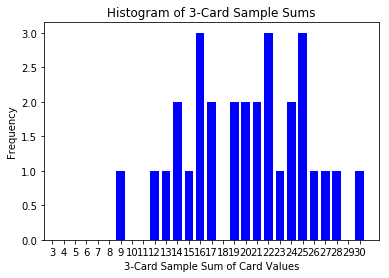

In [12]:
plt.hist(sample_sums, bins=[0.5+x for x in range(3,31,1)], facecolor='blue', rwidth=.75)
plt.xticks(range(3,31))
plt.title('Histogram of 3-Card Sample Sums')
plt.xlabel('3-Card Sample Sum of Card Values')
plt.ylabel('Frequency')
plt.show()

Based on the population mean value of 6.54 for a single card draw, the expected mean sum of card values for a 3-card draw would be:

In [13]:
3*np.average(deck_values)

19.615384615384613

The difference between this population mean and the observed mean of the 3-card samples is:

In [14]:
mean_difference = 3*np.average(deck_values) - np.average(sample_sums)
print("The difference between the expected and observed means is", mean_difference.round(2))

The difference between the expected and observed means is -0.45


The standard error of the sum of the 3-card sample is expected to be three times the standard deviation of the population (3 * 3.15) divided by the square root of 3 (the sample size):

In [15]:
(3*np.std(deck_values))/(3**.5)

5.460996722861184

The difference between this expected standard error mean and observed standard deviation of the sums of the values of the 3-card samples is:

In [16]:
std_difference = (3*np.std(deck_values))/(3**.5) - np.std(sample_sums)
print("The difference between the expected and observed standard deviations is", std_difference.round(2))

The difference between the expected and observed standard deviations is 0.37


**Note:**  Try larger numbers of trials (100 or 1000) of 3-card samples and the difference between the expected and observed standard deviation should converge toward zero.